<a href="https://www.kaggle.com/code/janmartins/diabetes-prediction-in-america-50?scriptVersionId=220791745" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-in-america-dataset/diabetes_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/diabetes-prediction-in-america-dataset/diabetes_dataset.csv')

In [3]:
df.head()

,Age,Gender,Ethnicity,Income,BMI,Blood_Pressure,Cholesterol,Exercise_Hours_Per_Week,Alcohol_Consumption_Per_Week,Smoking_Status,...,Insulin_Resistance,Heart_Disease_History,Physical_Activity_Level,Fast_Food_Intake_Per_Week,Processed_Food_Intake_Per_Week,Daily_Caloric_Intake,Sleep_Hours_Per_Night,Stress_Level,Medication_Use,Diabetes_Diagnosis
0,69,Female,Other,39557,38.2,94.6,252.9,3.3,4,Never,...,5.1,0,Low,3,4,3641,8.7,Low,0,1
1,32,Male,Black,90663,33.6,167.0,282.6,4.6,7,Never,...,1.7,1,Moderate,8,0,3361,8.0,Low,1,0
2,89,Male,White,116180,39.4,100.6,106.8,6.1,5,Former,...,4.9,1,Low,9,8,2397,8.8,High,1,0
3,78,Male,Other,73059,40.6,111.1,169.7,7.4,9,Never,...,9.8,0,High,7,5,2491,6.4,Low,1,1
4,38,Female,White,35389,29.7,143.3,296.5,2.6,6,Never,...,1.7,1,Moderate,0,7,1325,6.6,High,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             50000 non-null  int64  
 1   Gender                          50000 non-null  object 
 2   Ethnicity                       50000 non-null  object 
 3   Income                          50000 non-null  int64  
 4   BMI                             50000 non-null  float64
 5   Blood_Pressure                  50000 non-null  float64
 6   Cholesterol                     50000 non-null  float64
 7   Exercise_Hours_Per_Week         50000 non-null  float64
 8   Alcohol_Consumption_Per_Week    50000 non-null  int64  
 9   Smoking_Status                  50000 non-null  object 
 10  Family_History_Diabetes         50000 non-null  int64  
 11  Glucose_Level                   50000 non-null  float64
 12  HbA1c                           

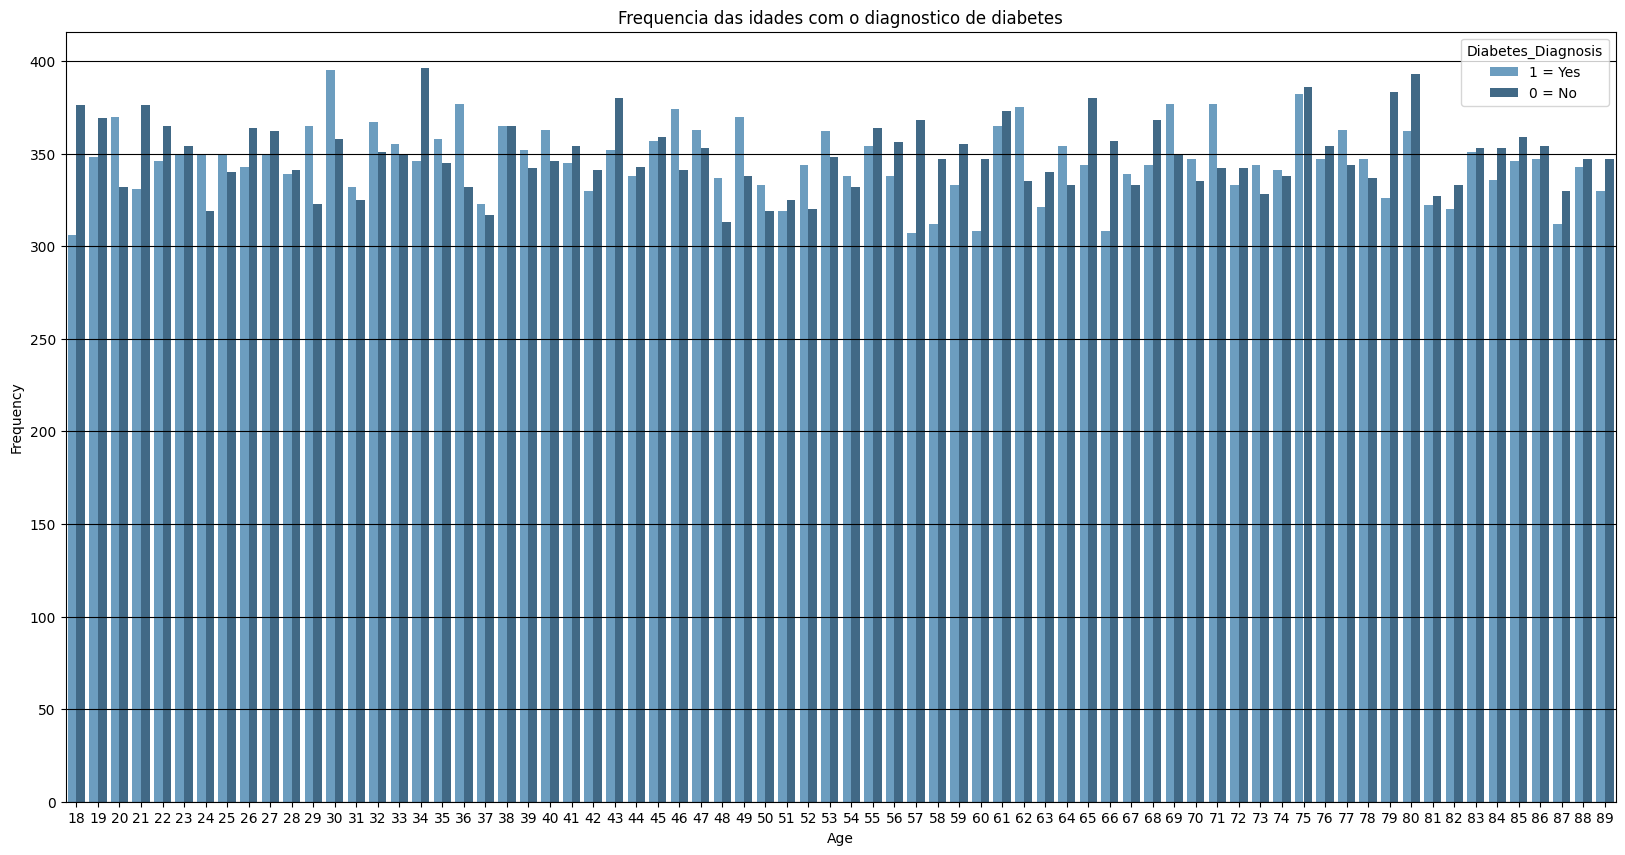

In [5]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Age', hue='Diabetes_Diagnosis', data=df, palette='Blues_d')
plt.title('Frequencia das idades com o diagnostico de diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
# Modificar a legenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['1 = Yes', '0 = No']
plt.legend(handles, labels, title="Diabetes_Diagnosis")
plt.show()

In [6]:
contagem = df.groupby(['Age', 'Diabetes_Diagnosis']).size().reset_index(name='Frequency')
contagem

,Age,Diabetes_Diagnosis,Frequency
0,18,0,306
1,18,1,376
2,19,0,348
3,19,1,369
4,20,0,370
...,...,...,...
139,87,1,330
140,88,0,343
141,88,1,347
142,89,0,330


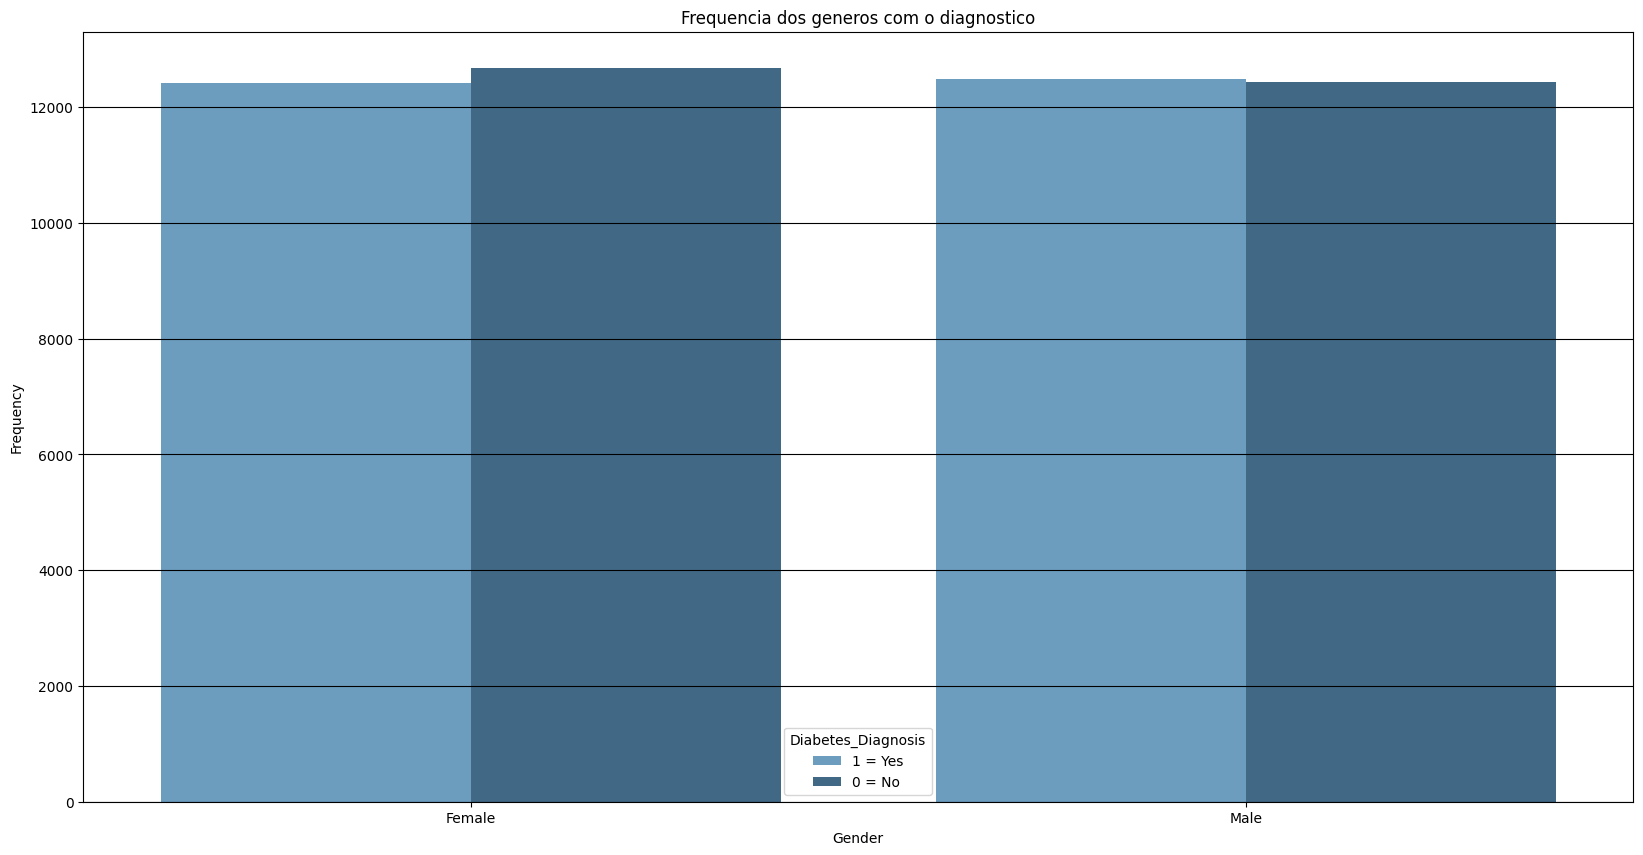

In [7]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Gender', hue='Diabetes_Diagnosis', data=df, palette='Blues_d')
plt.title('Frequencia dos generos com o diagnostico')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
# Modificar a legenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['1 = Yes', '0 = No']
plt.legend(handles, labels, title="Diabetes_Diagnosis")
plt.show()

In [8]:
contagem = df.groupby(['Gender', 'Diabetes_Diagnosis']).size().reset_index(name='Frequency')
contagem

,Gender,Diabetes_Diagnosis,Frequency
0,Female,0,12416
1,Female,1,12670
2,Male,0,12480
3,Male,1,12434


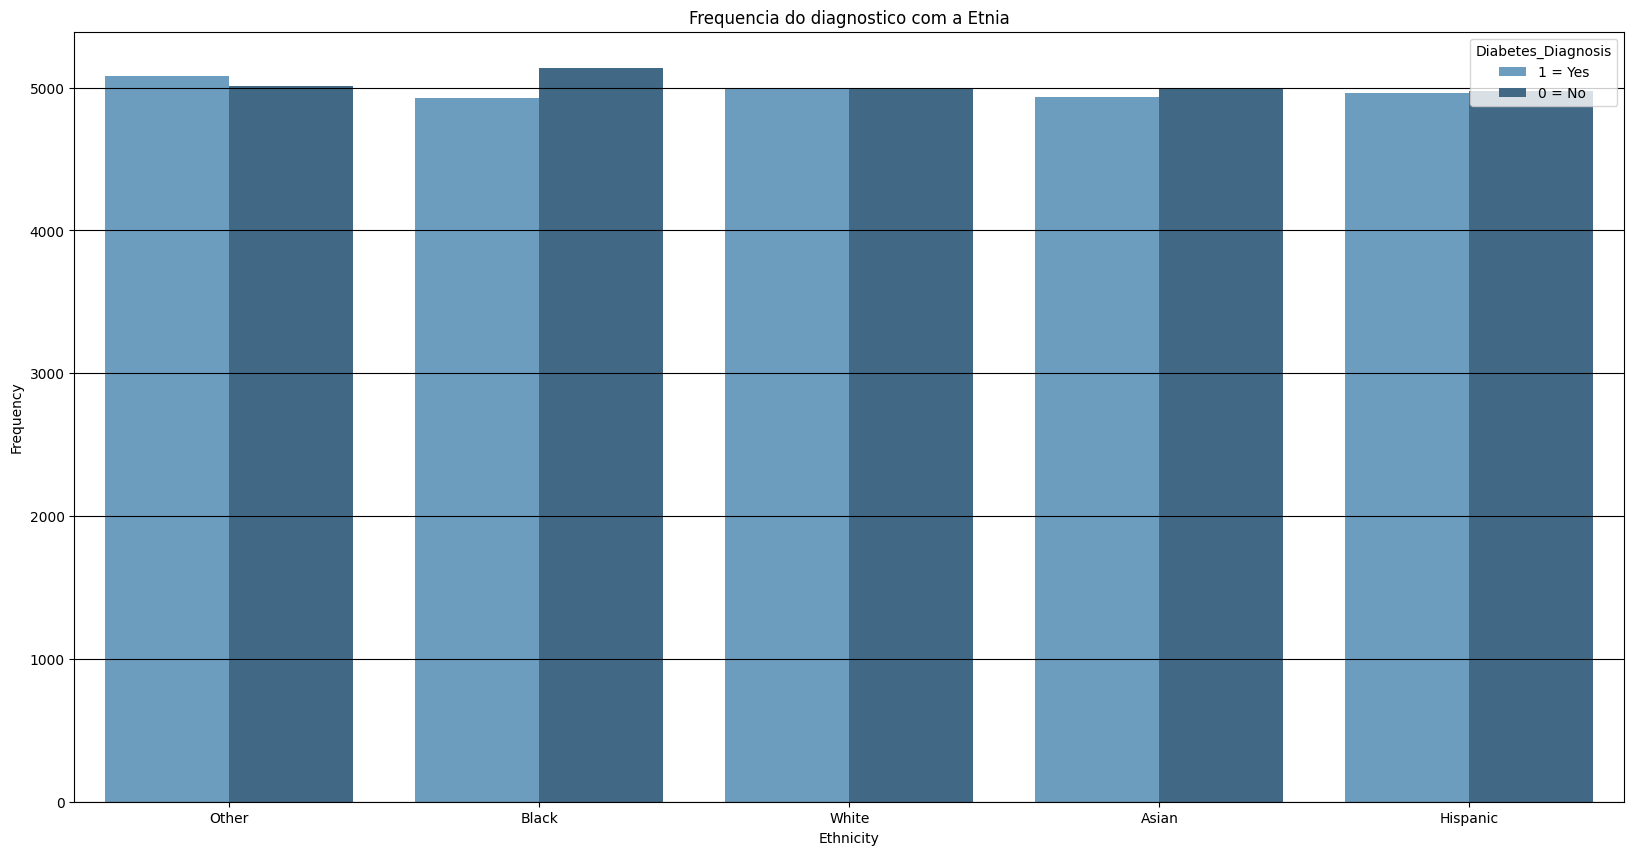

In [9]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Ethnicity', hue='Diabetes_Diagnosis', data=df, palette='Blues_d')
plt.title('Frequencia do diagnostico com a Etnia')
plt.xlabel('Ethnicity')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
# Modificar a legenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['1 = Yes', '0 = No']
plt.legend(handles, labels, title="Diabetes_Diagnosis")
plt.show()

In [10]:
contagem = df.groupby(['Ethnicity', 'Diabetes_Diagnosis']).size().reset_index(name='Frequency')
contagem

,Ethnicity,Diabetes_Diagnosis,Frequency
0,Asian,0,4935
1,Asian,1,4988
2,Black,0,4928
3,Black,1,5135
4,Hispanic,0,4964
5,Hispanic,1,4974
6,Other,0,5081
7,Other,1,5013
8,White,0,4988
9,White,1,4994


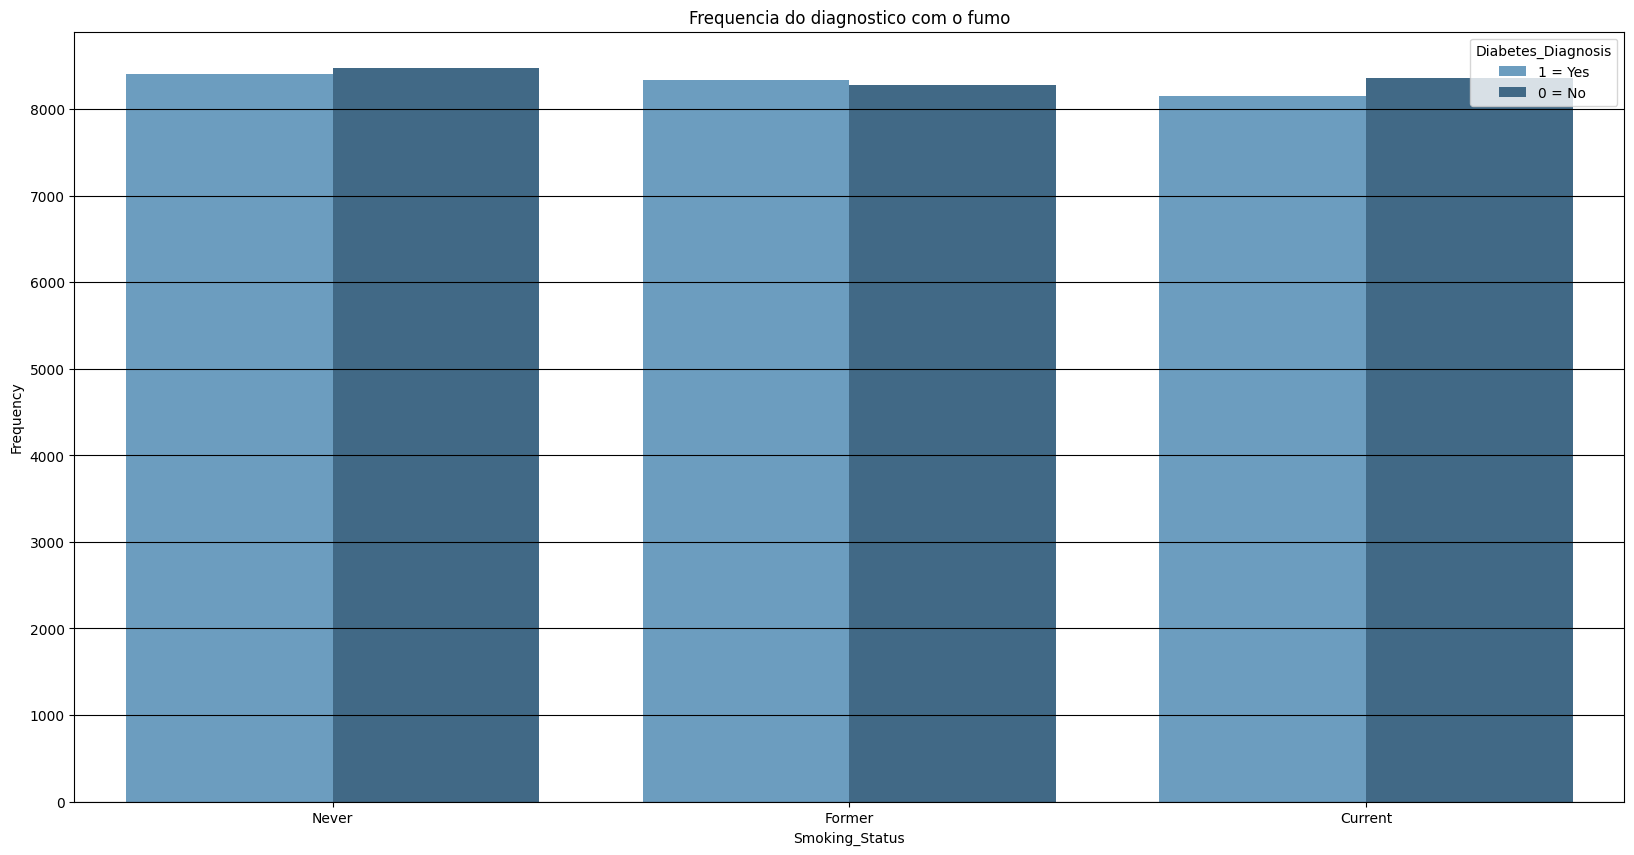

In [11]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Smoking_Status', hue='Diabetes_Diagnosis', data=df, palette='Blues_d')
plt.title('Frequencia do diagnostico com o fumo')
plt.xlabel('Smoking_Status')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
# Modificar a legenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['1 = Yes', '0 = No']
plt.legend(handles, labels, title="Diabetes_Diagnosis")
plt.show()

In [12]:
contagem = df.groupby(['Smoking_Status', 'Diabetes_Diagnosis']).size().reset_index(name='Frequency')
contagem

,Smoking_Status,Diabetes_Diagnosis,Frequency
0,Current,0,8150
1,Current,1,8359
2,Former,0,8339
3,Former,1,8274
4,Never,0,8407
5,Never,1,8471


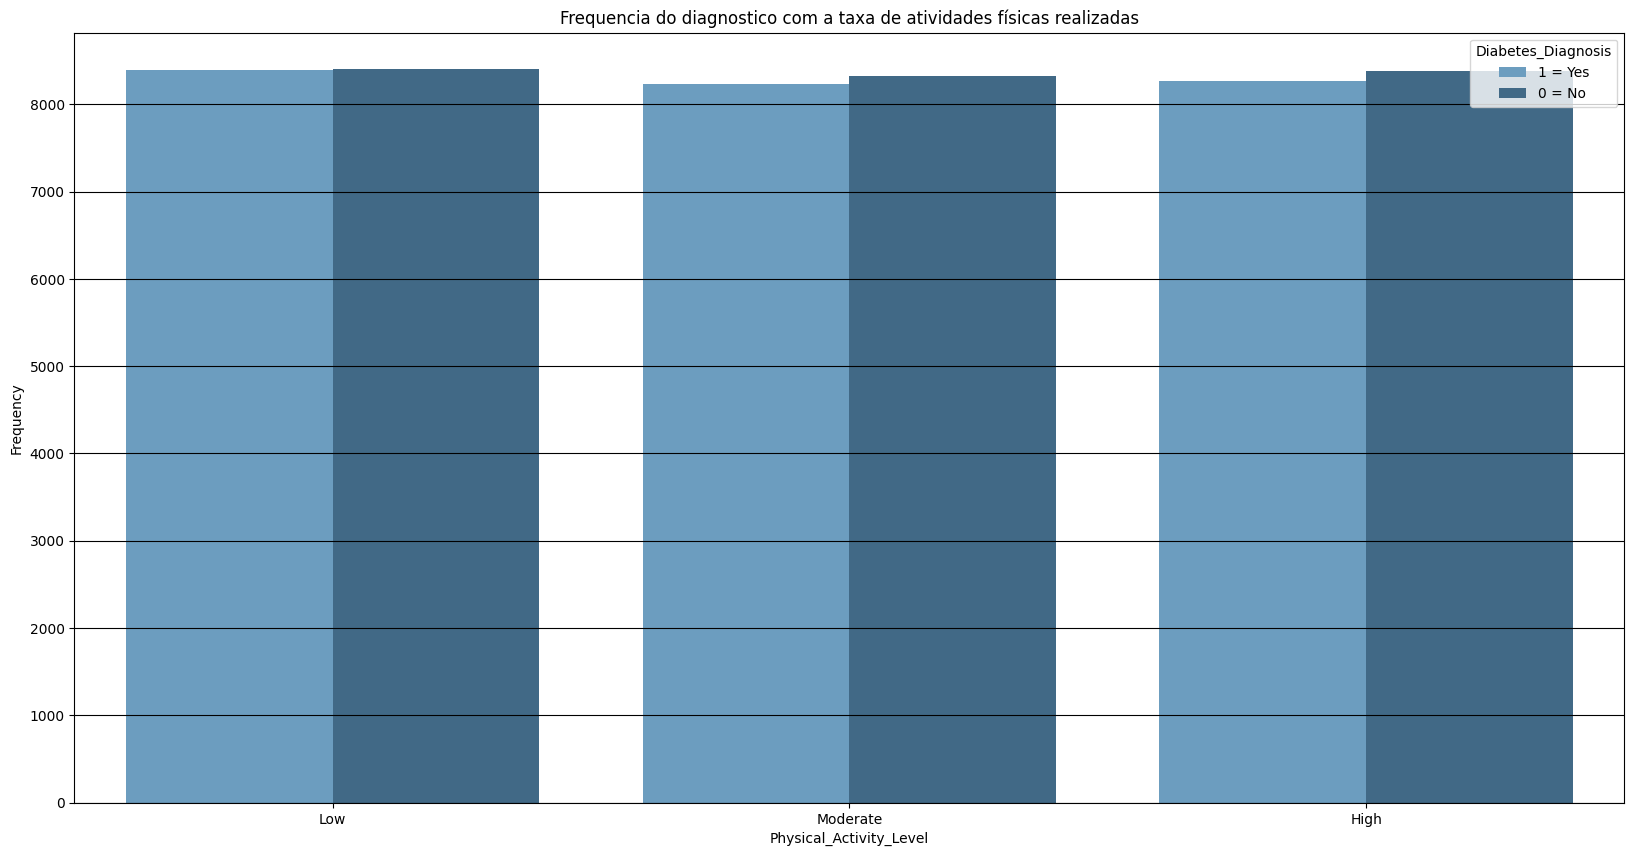

In [13]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Physical_Activity_Level', hue='Diabetes_Diagnosis', data=df, palette='Blues_d')
plt.title('Frequencia do diagnostico com a taxa de atividades físicas realizadas')
plt.xlabel('Physical_Activity_Level')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
# Modificar a legenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['1 = Yes', '0 = No']
plt.legend(handles, labels, title="Diabetes_Diagnosis")
plt.show()

In [14]:
contagem = df.groupby(['Physical_Activity_Level', 'Diabetes_Diagnosis']).size().reset_index(name='Frequency')
contagem

,Physical_Activity_Level,Diabetes_Diagnosis,Frequency
0,High,0,8272
1,High,1,8385
2,Low,0,8388
3,Low,1,8401
4,Moderate,0,8236
5,Moderate,1,8318


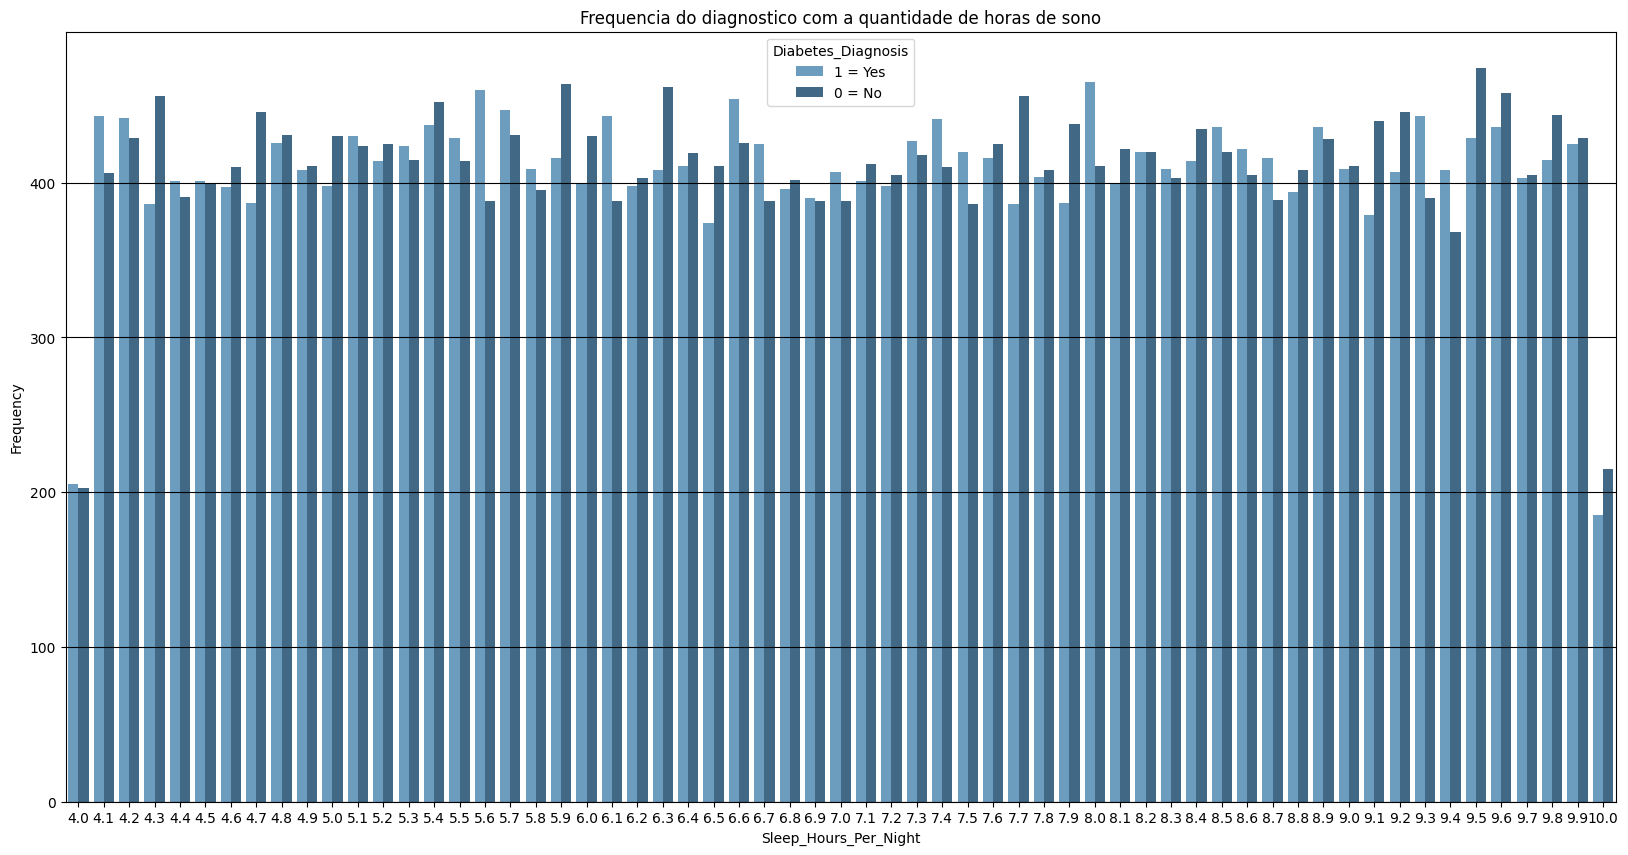

In [15]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Sleep_Hours_Per_Night', hue='Diabetes_Diagnosis', data=df, palette='Blues_d')
plt.title('Frequencia do diagnostico com a quantidade de horas de sono')
plt.xlabel('Sleep_Hours_Per_Night')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
# Modificar a legenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['1 = Yes', '0 = No']
plt.legend(handles, labels, title="Diabetes_Diagnosis")
plt.show()

In [16]:
contagem = df.groupby(['Sleep_Hours_Per_Night', 'Diabetes_Diagnosis']).size().reset_index(name='Frequency')
contagem

,Sleep_Hours_Per_Night,Diabetes_Diagnosis,Frequency
0,4.0,0,205
1,4.0,1,203
2,4.1,0,443
3,4.1,1,406
4,4.2,0,442
...,...,...,...
117,9.8,1,444
118,9.9,0,425
119,9.9,1,429
120,10.0,0,185


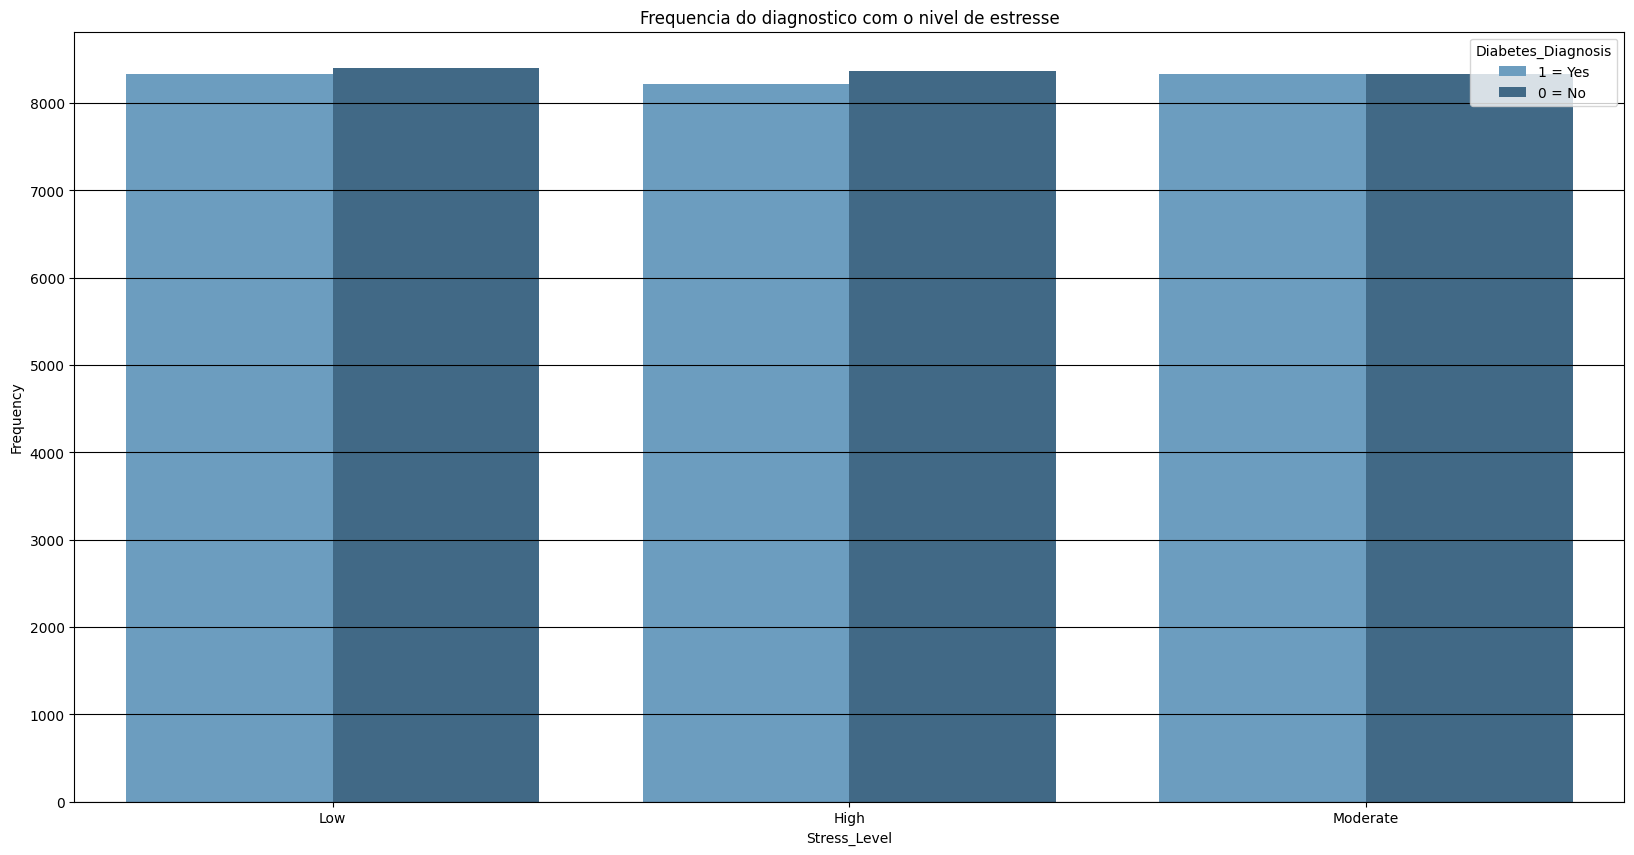

In [17]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Stress_Level', hue='Diabetes_Diagnosis', data=df, palette='Blues_d')
plt.title('Frequencia do diagnostico com o nivel de estresse')
plt.xlabel('Stress_Level')
plt.ylabel('Frequency')
plt.grid(axis='y', color='black')
plt.xticks(rotation=0)
# Modificar a legenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['1 = Yes', '0 = No']
plt.legend(handles, labels, title="Diabetes_Diagnosis")
plt.show()

In [18]:
contagem = df.groupby(['Stress_Level', 'Diabetes_Diagnosis']).size().reset_index(name='Frequency')
contagem

,Stress_Level,Diabetes_Diagnosis,Frequency
0,High,0,8223
1,High,1,8371
2,Low,0,8335
3,Low,1,8399
4,Moderate,0,8338
5,Moderate,1,8334


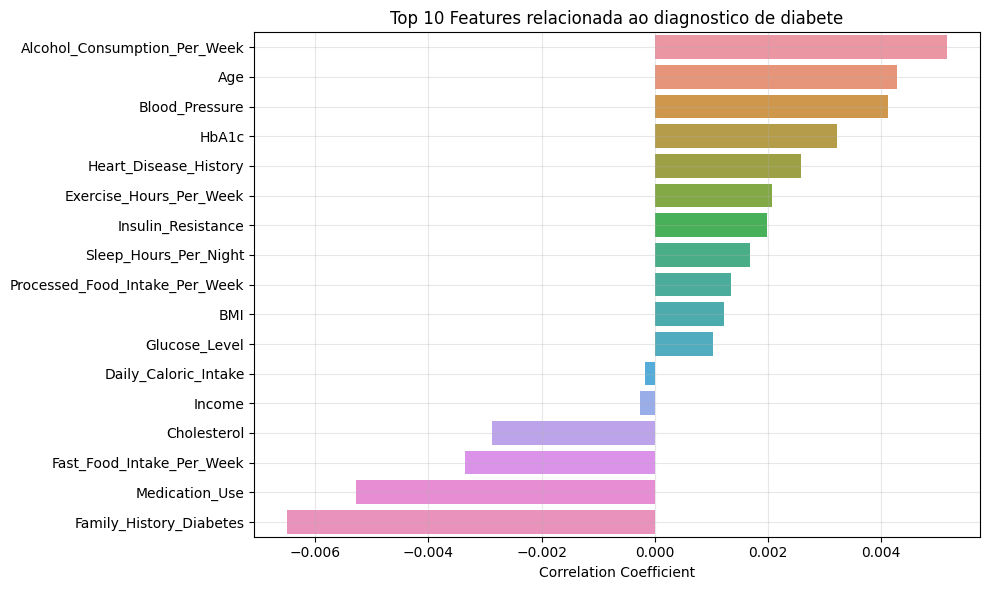

In [19]:
#Rodei depois do pré-processamento para verificar se as relações estão corretas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculando a correção com o diagnoestico
correlation = numeric_df.corr()["Diabetes_Diagnosis"].sort_values(ascending=False)

# Excluindo 'Diabetes_Diagnosis'
correlation = correlation.drop("Diabetes_Diagnosis")

# Visualizando as ultimas correlações
plt.figure(figsize=(10, 6))
top_features = correlation.head(20)  # Get top 20 features
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Features relacionada ao diagnostico de diabete")
plt.xlabel("Correlation Coefficient")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ML

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [21]:
# Pré-processamento
le = LabelEncoder()

categorical_columns = ['Gender', 'Ethnicity', 'Smoking_Status', 'Physical_Activity_Level', 'Stress_Level']

# Aplicando LabelEncoder para todas as colunas categóricas
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [22]:

# Definindo as variáveis X (features) e y (target)
X = df.drop(['Diabetes_Diagnosis', 'Income', 'Medication_Use', 'Ethnicity', 'Gender', 'Smoking_Status', 'Physical_Activity_Level', 'Stress_Level',
             'Cholesterol', 'Family_History_Diabetes', 'Cholesterol', 'Fast_Food_Intake_Per_Week',
             'Glucose_Level','Daily_Caloric_Intake', 'Sleep_Hours_Per_Night', 'BMI', 'Insulin_Resistance'], axis=1)  # Remover colunas desnecessárias
y = df['Diabetes_Diagnosis']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Arvore de decisao


In [23]:
# Treinando o modelo
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prevendo e avaliando o modelo
y_pred = clf.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f"Acurácia média com validação cruzada: {scores.mean()}")

Acurácia: 0.4937
Acurácia média com validação cruzada: 0.503675


# Random Forest


In [24]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f"Acurácia média com validação cruzada: {scores.mean()}")

Acurácia: 0.4968
Acurácia média com validação cruzada: 0.5019750000000001


# Normalizar dados


In [25]:
# Normalizando os dados com StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regressao Logistica


In [26]:
clf = LogisticRegression(random_state=42, max_iter = 3000, solver='liblinear', C=0.1, tol=1e-5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))

scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f"Acurácia média com validação cruzada: {scores.mean()}")

Acurácia: 0.5
Acurácia média com validação cruzada: 0.498175


# Redes Neurais


In [27]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))

scores = cross_val_score(mlp, X_train, y_train, cv=5)
print(f"Acurácia média com validação cruzada: {scores.mean()}")

Acurácia: 0.5005
Acurácia média com validação cruzada: 0.5012500000000001
